In [23]:
from Mixture_Models import *

#### Simulating some data

In [24]:
data = make_pinwheel(radial_std=0.3, tangential_std=0.05, num_classes=3,
                         num_per_class=100, rate=0.4,rs=npr.RandomState(0))

#### Initializing the model

In [25]:
test_GMM = Mclust(data,constraint='VVV')

#### Initializing the input parameters

In [26]:
npr.seed(10)
init_params = test_GMM.init_params(num_components=3,scale=0.5)
print(init_params)

{'log proportions': array([ 0.66579325,  0.35763949, -0.77270015]), 'means': array([[-0.00419192,  0.31066799],
       [-0.36004278,  0.13275579],
       [ 0.05427426,  0.00214572]]), 'volumes': array([-0.08730011,  0.21651309,  0.60151869]), 'shapes': array([-0.48253284,  0.51413704]), 'orientations': array([[[ 0.22863013,  0.44513761],
        [-1.13660221,  0.13513688]],

       [[ 1.484537  , -1.07980489],
        [-1.97772828, -1.7433723 ]],

       [[ 0.26607016,  2.38496733],
        [ 1.12369125,  1.67262221]]])}


#### Fitting the model with the above initialization parameters

In [27]:
## we are using gradient descent with momentum for 100 iterations with mass = 0.9 and learning rate = 5e-4
params_store = test_GMM.fit(init_params,"grad_descent", learning_rate = 0.0005, mass = 0.9, maxiter = 100) 

Log likelihood -760.0735391863761
Log likelihood -759.2390571295567
Log likelihood -757.6681477598302
Log likelihood -755.4608826680308
Log likelihood -752.716538342808
Log likelihood -749.531391132459
Log likelihood -745.9970141623476
Log likelihood -742.1989954160595
Log likelihood -738.2160127582304
Log likelihood -734.1192132189805
Log likelihood -729.9718522246937
Log likelihood -725.8291548618581
Log likelihood -721.7383663966306
Log likelihood -717.7389634621212
Log likelihood -713.8630006547278
Log likelihood -710.1355697379563
Log likelihood -706.575350233761
Log likelihood -703.1952309648956
Log likelihood -700.002982284916
Log likelihood -697.001958583758
Log likelihood -694.1918105341895
Log likelihood -691.5691867964862
Log likelihood -689.1284058134133
Log likelihood -686.862080083615
Log likelihood -684.7616779408265
Log likelihood -682.8180112933262
Log likelihood -681.0216417815896
Log likelihood -679.3632021040895
Log likelihood -677.8336335216321
Log likelihood -676.

#### Posthoc analysis

In [28]:
### We define an auxillary function for plotting the clusters
def draw_clusters(unpacked_params,input_data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for log_proportion, mean, shape, orientation, volume in zip(*unpacked_params):
        cov_sqrt = np.sqrt(volume * shape) @ orientation.T
        num_points = 100
        alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
        angles = np.linspace(0, 2*np.pi, num_points)
        circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
        cur_pts = mean + np.dot(circle_pts, cov_sqrt)
        ax.plot(cur_pts[:, 0], cur_pts[:, 1], '-', alpha=alpha)
        ax.plot(input_data[:, 0], input_data[:, 1], 'k.')
    ax.plot(input_data[:, 0], input_data[:, 1], 'k.')

    plt.show()
    

likelihood -760.0735391863761
aic,bic 1550.1470783727523 1605.7038154925954


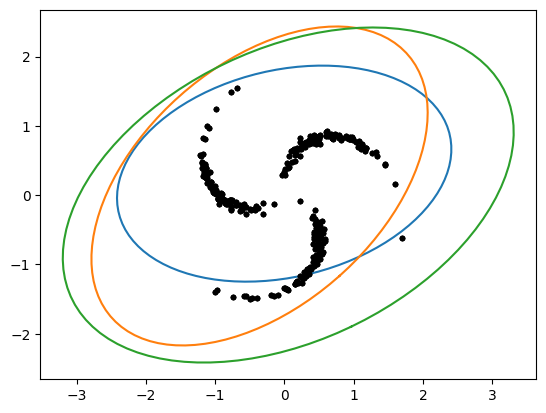

mpkl 0.19323990179507722
likelihood -759.2390571295567
aic,bic 1548.4781142591135 1604.0348513789565


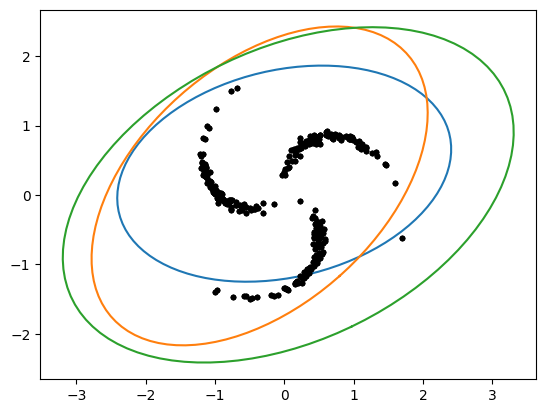

mpkl 0.1933564182250973
likelihood -757.6681477598302
aic,bic 1545.3362955196603 1600.8930326395034


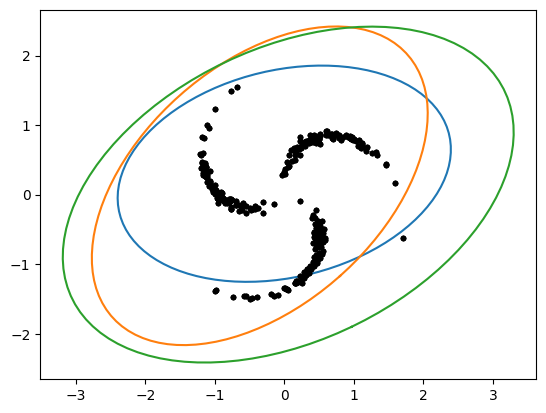

mpkl 0.19361359298477998
likelihood -755.4608826680308
aic,bic 1540.9217653360615 1596.4785024559046


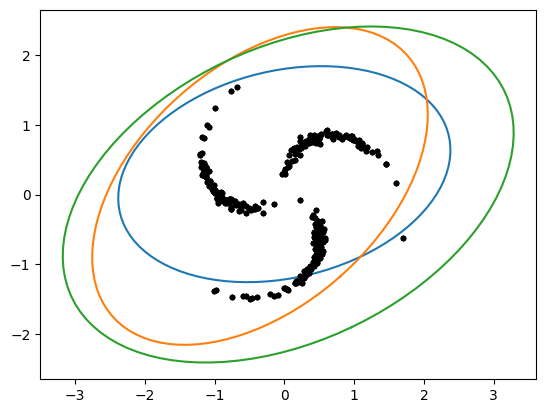

mpkl 0.19406268675361726
likelihood -752.716538342808
aic,bic 1535.433076685616 1590.989813805459


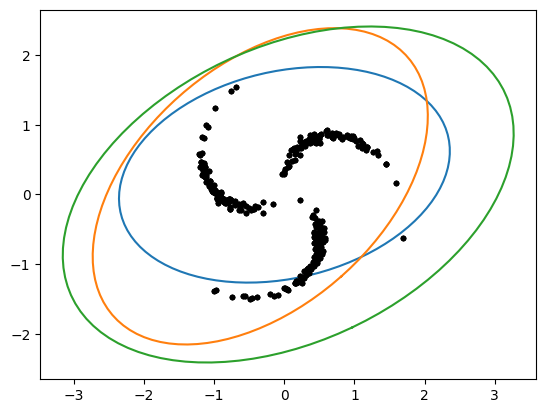

mpkl 0.19477369560785673
likelihood -749.531391132459
aic,bic 1529.062782264918 1584.6195193847611


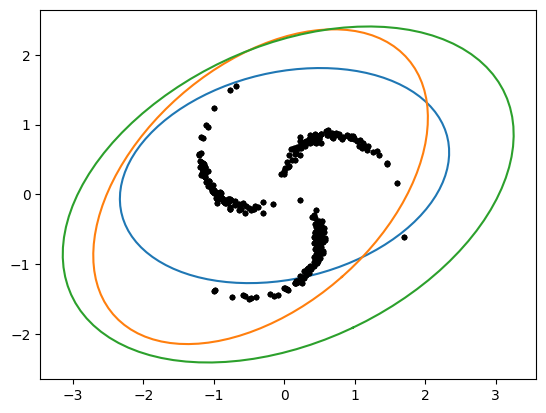

mpkl 0.1958284749108814
likelihood -745.9970141623476
aic,bic 1521.9940283246951 1577.5507654445382


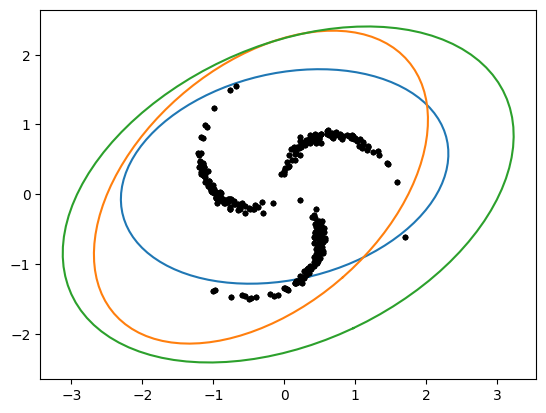

mpkl 0.19731493158086155
likelihood -742.1989954160595
aic,bic 1514.397990832119 1569.954727951962


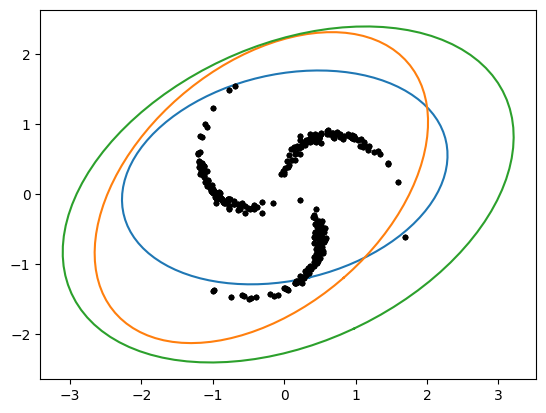

mpkl 0.19932200308558223
likelihood -738.2160127582304
aic,bic 1506.4320255164607 1561.9887626363038


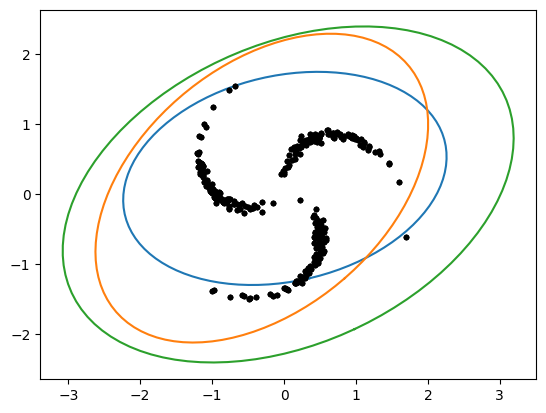

mpkl 0.2019352510184642
likelihood -734.1192132189805
aic,bic 1498.238426437961 1553.795163557804


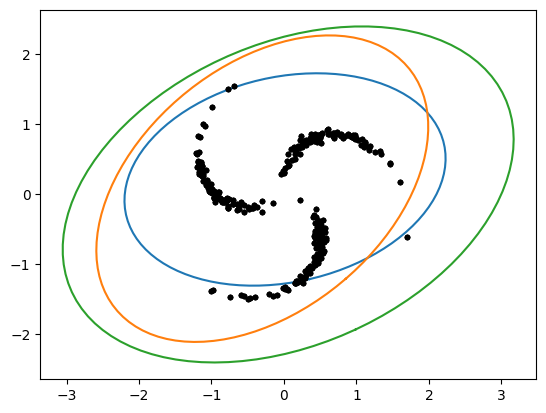

mpkl 0.20523297315166045
likelihood -729.9718522246937
aic,bic 1489.9437044493875 1545.5004415692306


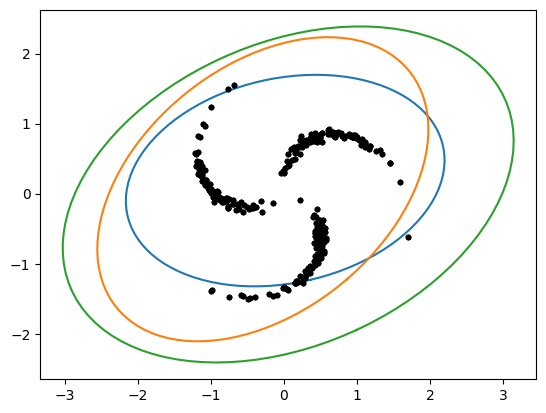

mpkl 0.20928279094443636
likelihood -725.8291548618581
aic,bic 1481.6583097237162 1537.2150468435593


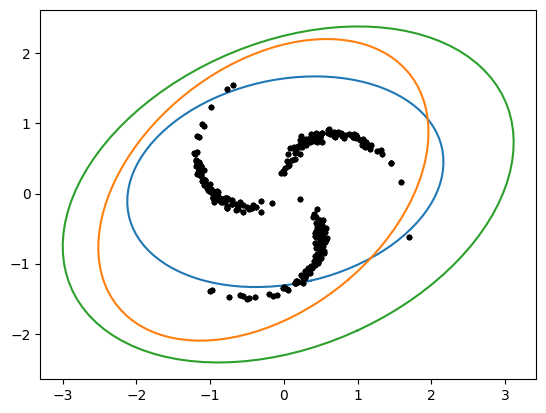

mpkl 0.21413870664763435
likelihood -721.7383663966306
aic,bic 1473.4767327932611 1529.0334699131042


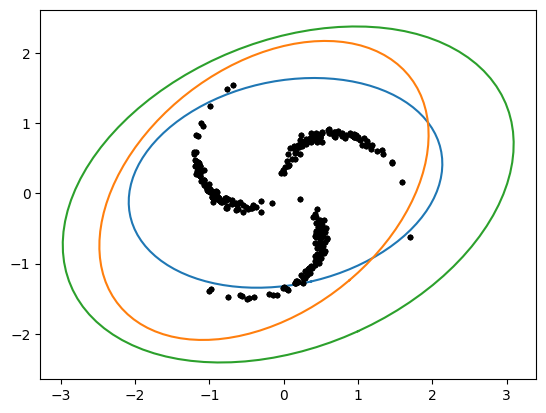

mpkl 0.21983864958906874
likelihood -717.7389634621212
aic,bic 1465.4779269242424 1521.0346640440855


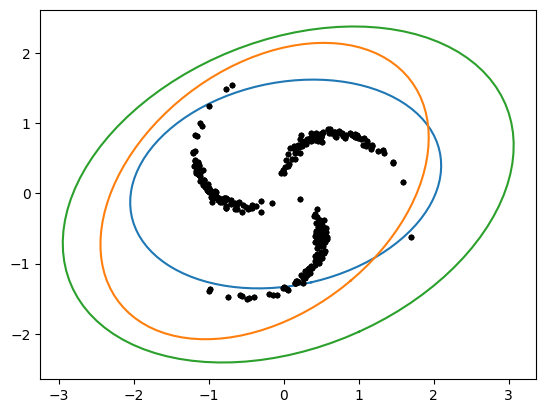

mpkl 0.22640254706870921
likelihood -713.8630006547278
aic,bic 1457.7260013094556 1513.2827384292987


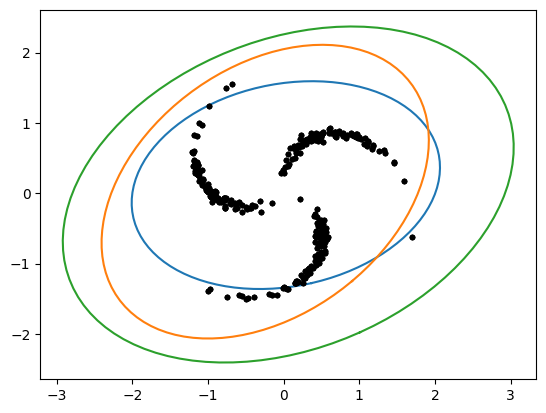

mpkl 0.2338309623435162
likelihood -710.1355697379563
aic,bic 1450.2711394759126 1505.8278765957557


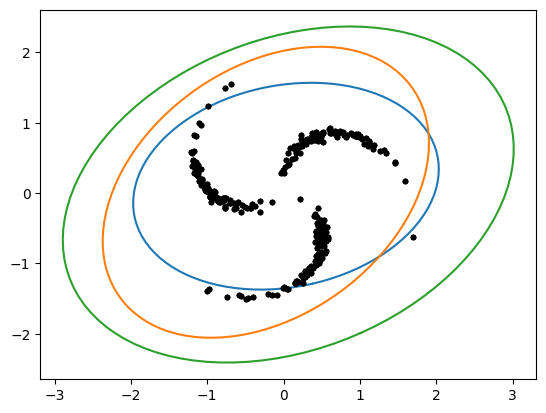

mpkl 0.24210434065104725
likelihood -706.575350233761
aic,bic 1443.150700467522 1498.7074375873651


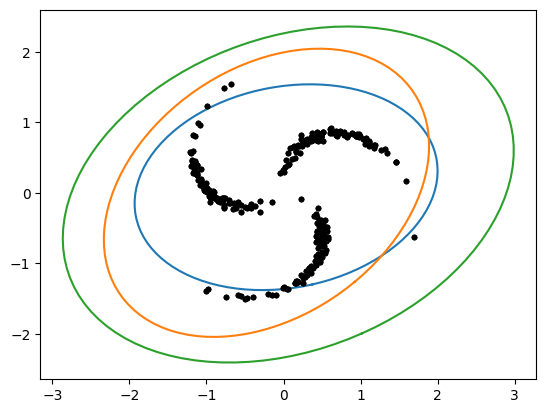

mpkl 0.25118289432514884
likelihood -703.1952309648956
aic,bic 1436.3904619297912 1491.9471990496343


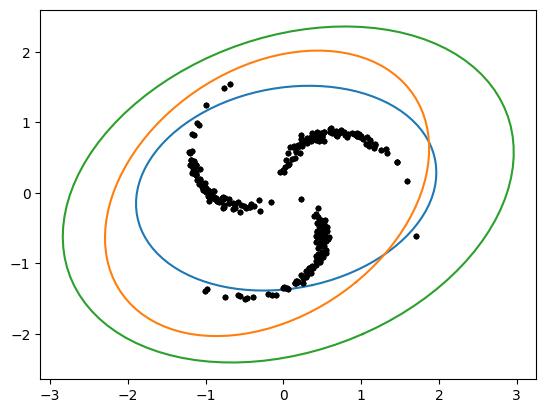

mpkl 0.2610071404648415
likelihood -700.002982284916
aic,bic 1430.005964569832 1485.5627016896751


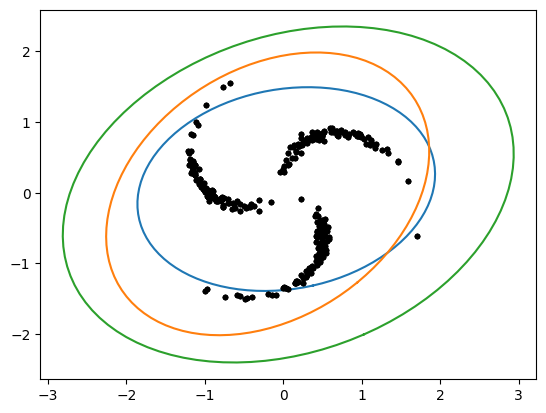

mpkl 0.27149908070684714
likelihood -697.001958583758
aic,bic 1424.003917167516 1479.560654287359


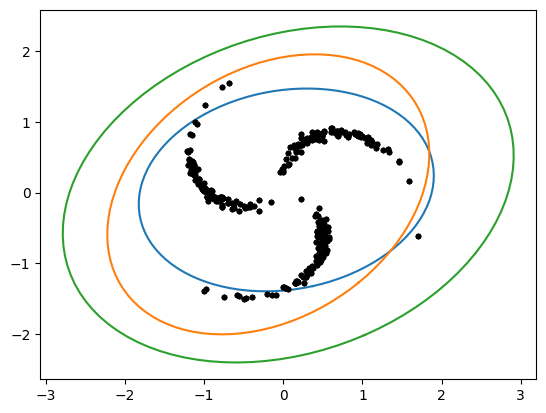

mpkl 0.2825639845670245
likelihood -694.1918105341895
aic,bic 1418.383621068379 1473.940358188222


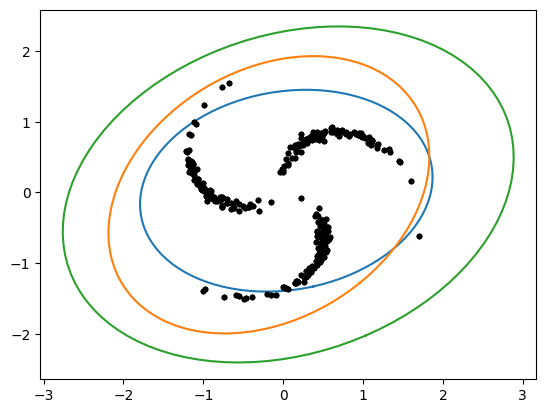

mpkl 0.2940927083292568
likelihood -691.5691867964862
aic,bic 1413.1383735929724 1468.6951107128154


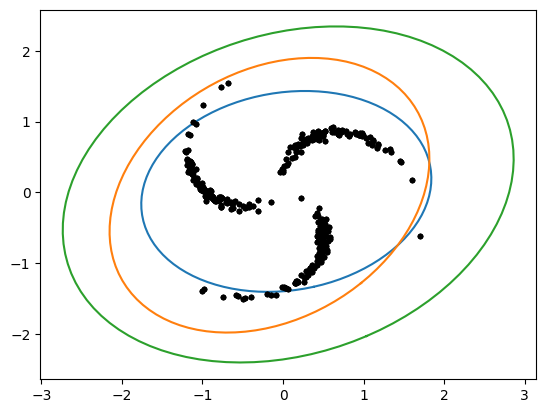

mpkl 0.3059644536805133
likelihood -689.1284058134133
aic,bic 1408.2568116268267 1463.8135487466698


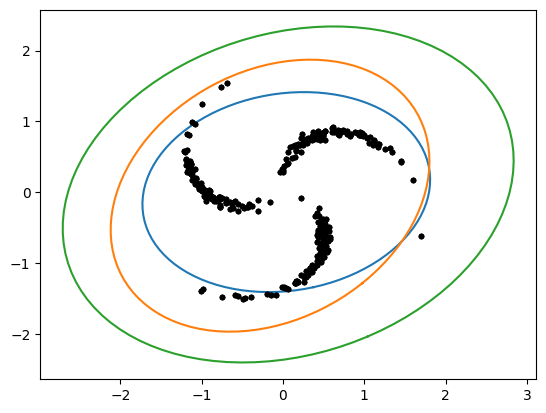

mpkl 0.31804984727009833
likelihood -686.862080083615
aic,bic 1403.72416016723 1459.280897287073


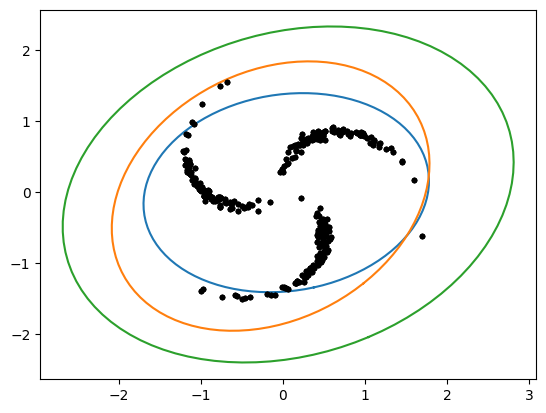

mpkl 0.3302142066931206
likelihood -684.7616779408265
aic,bic 1399.523355881653 1455.0800930014962


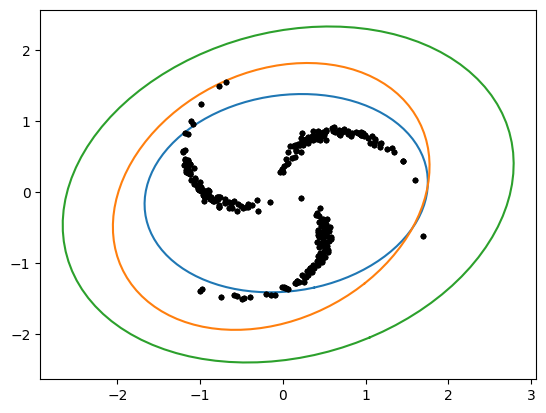

mpkl 0.34232085182246896
likelihood -682.8180112933262
aic,bic 1395.6360225866524 1451.1927597064955


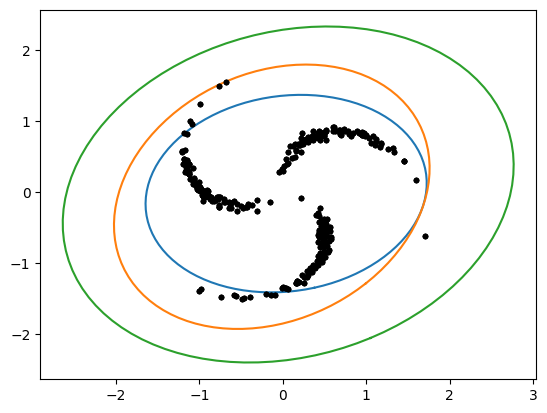

mpkl 0.35423432364289886
likelihood -681.0216417815896
aic,bic 1392.043283563179 1447.6000206830222


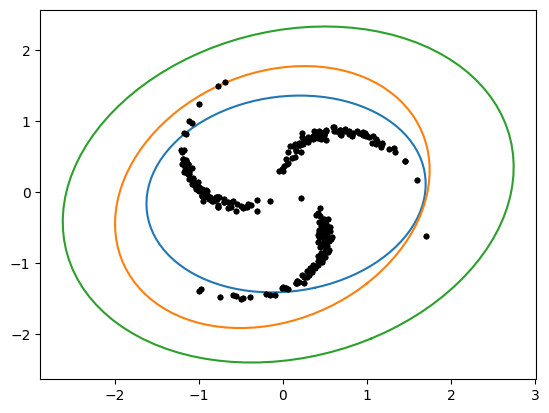

mpkl 0.36582338535095027
likelihood -679.3632021040895
aic,bic 1388.726404208179 1444.283141328022


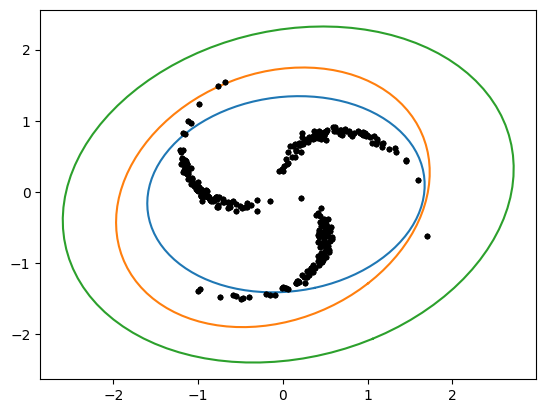

mpkl 0.3769637010233178
likelihood -677.8336335216321
aic,bic 1385.6672670432642 1441.2240041631073


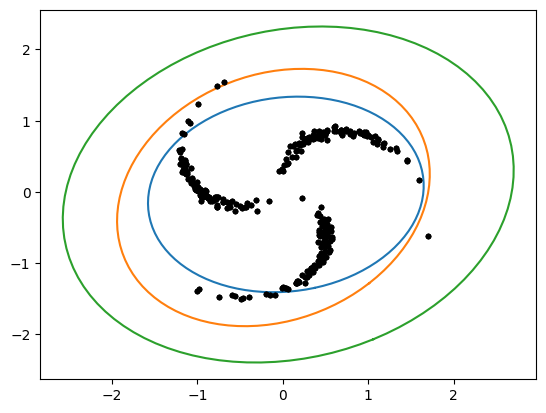

mpkl 0.387540113385231
likelihood -676.4243444713011
aic,bic 1382.8486889426022 1438.4054260624453


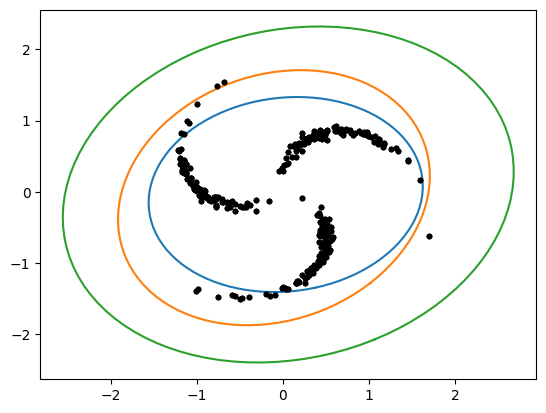

mpkl 0.3974484714397102
likelihood -675.1272985401193
aic,bic 1380.2545970802387 1435.8113342000818


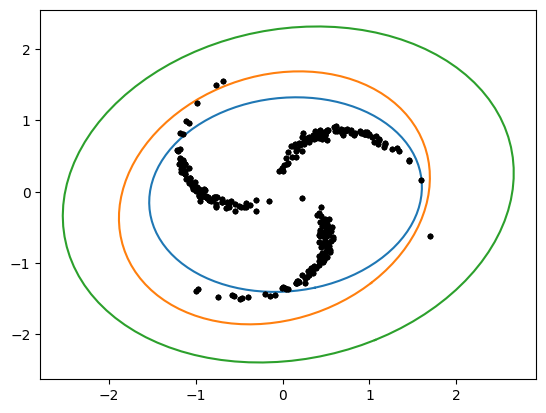

mpkl 0.40659698817426104
likelihood -673.935042573715
aic,bic 1377.87008514743 1433.426822267273


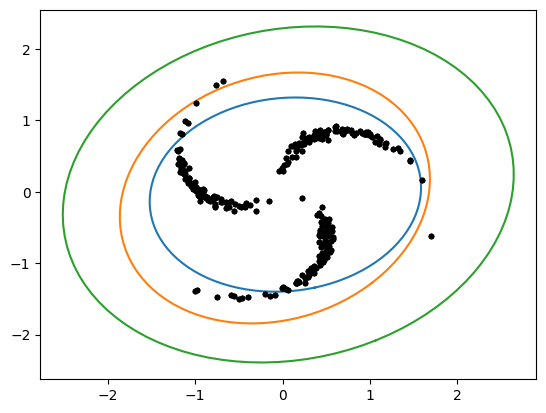

mpkl 0.41490713572467763
likelihood -672.8406873151805
aic,bic 1375.681374630361 1431.238111750204


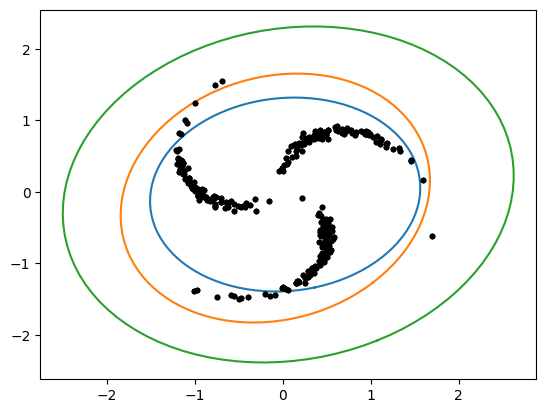

mpkl 0.42231410824746063
likelihood -671.8378536542125
aic,bic 1373.675707308425 1429.232444428268


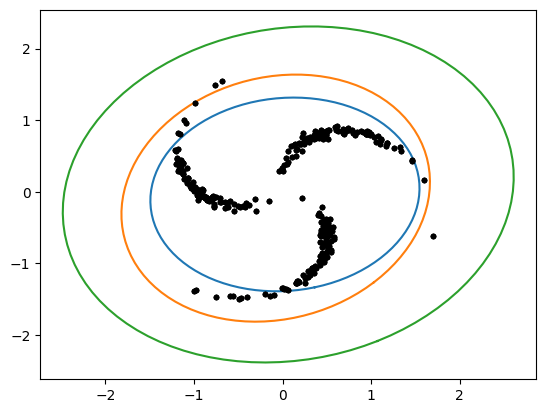

mpkl 0.42876690001725826
likelihood -670.9205973617156
aic,bic 1371.8411947234313 1427.3979318432744


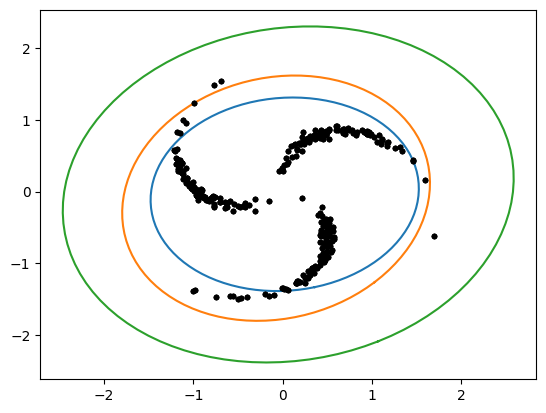

mpkl 0.43422805734522973
likelihood -670.0833241983772
aic,bic 1370.1666483967545 1425.7233855165975


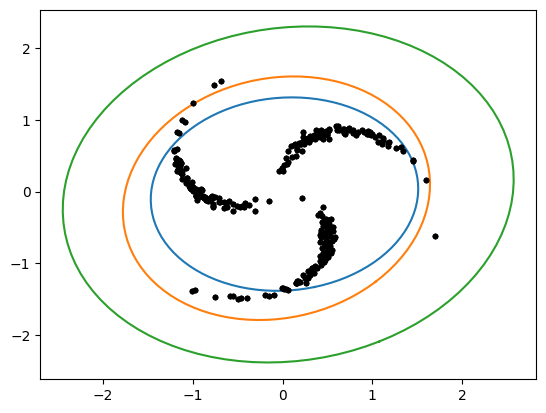

mpkl 0.438673167921668
likelihood -669.3207056728776
aic,bic 1368.6414113457552 1424.1981484655983


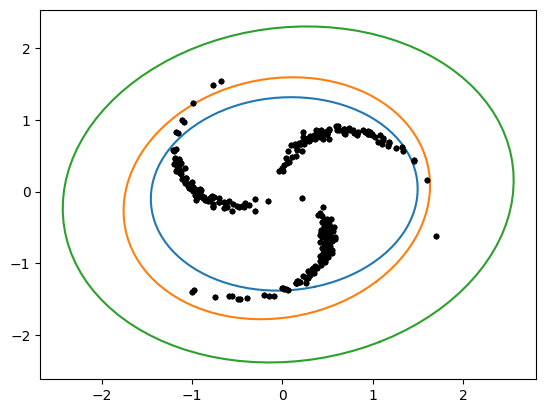

mpkl 0.44209015080545644
likelihood -668.6276036723818
aic,bic 1367.2552073447637 1422.8119444646068


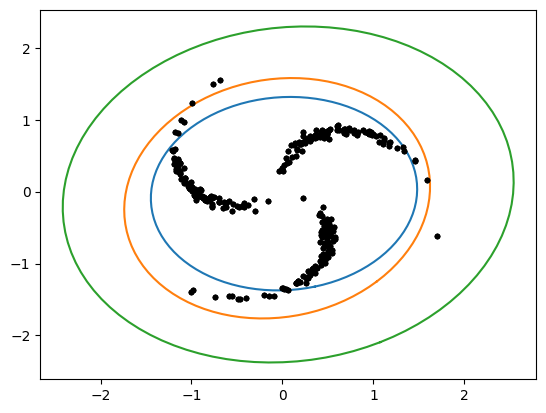

mpkl 0.44447840559904295
likelihood -667.9990098935004
aic,bic 1365.9980197870009 1421.554756906844


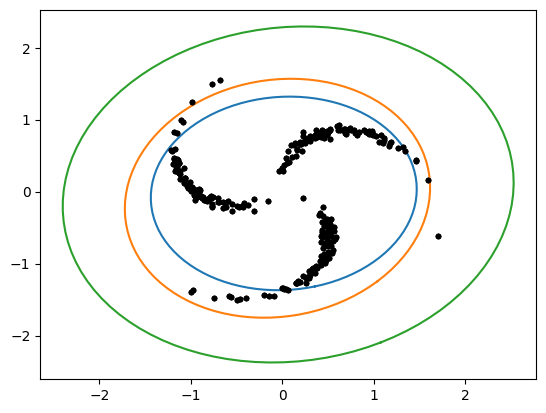

mpkl 0.4458478716605516
likelihood -667.4300036602724
aic,bic 1364.8600073205448 1420.416744440388


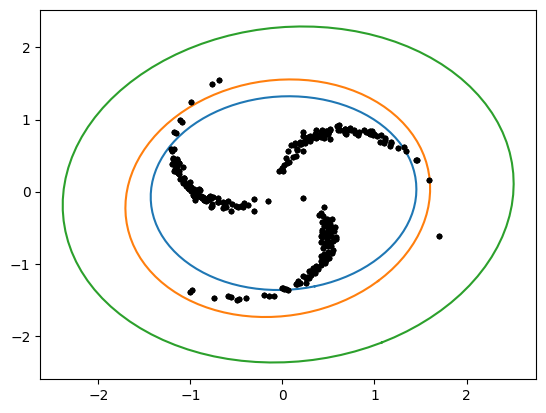

mpkl 0.446218038850859
likelihood -666.9157295014575
aic,bic 1363.831459002915 1419.388196122758


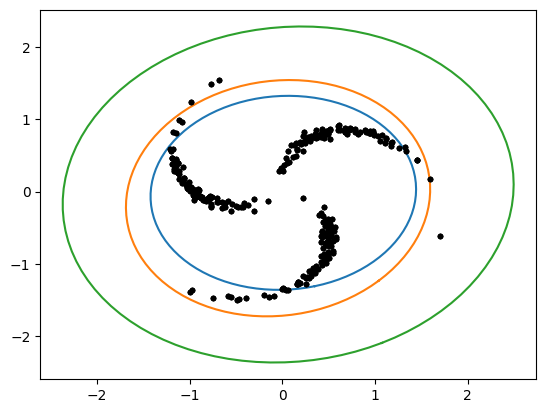

mpkl 0.4456169415172295
likelihood -666.4513939150028
aic,bic 1362.9027878300055 1418.4595249498486


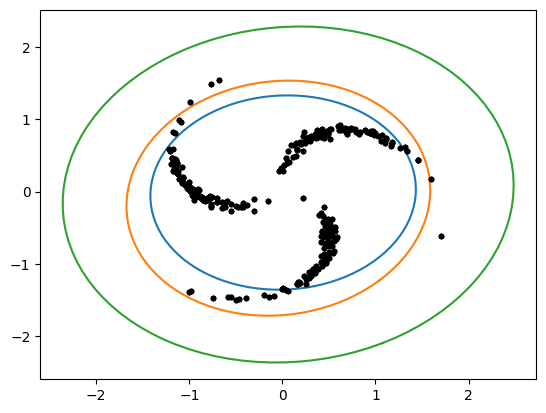

mpkl 0.44408015818031266
likelihood -666.0322791753138
aic,bic 1362.0645583506275 1417.6212954704706


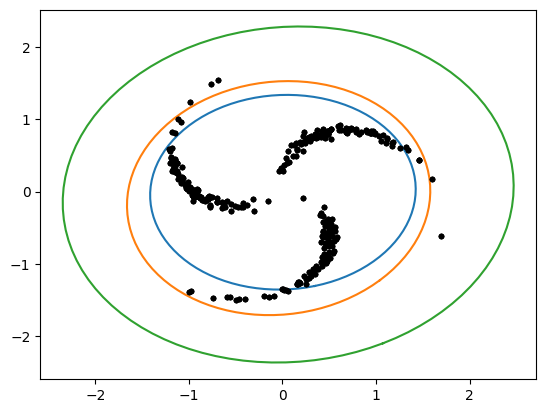

mpkl 0.44164983144092274
likelihood -665.6537708974334
aic,bic 1361.307541794867 1416.86427891471


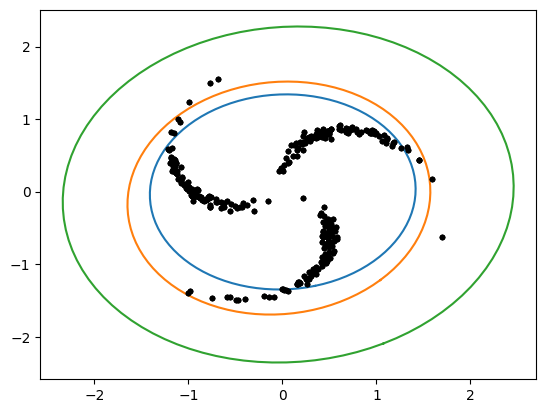

mpkl 0.438373716381081
likelihood -665.311395377297
aic,bic 1360.622790754594 1416.179527874437


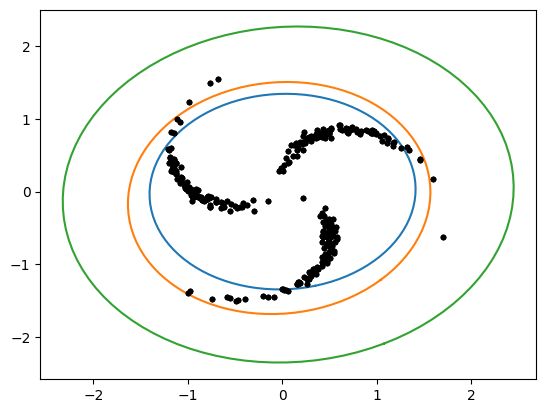

mpkl 0.4343042613465733
likelihood -665.0008624570279
aic,bic 1360.0017249140558 1415.5584620338989


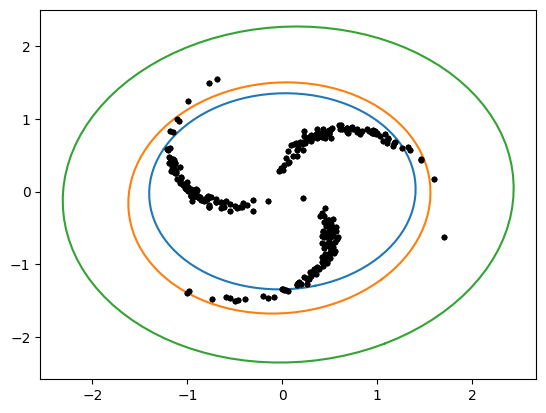

mpkl 0.42949772238076833
likelihood -664.7181097671295
aic,bic 1359.436219534259 1414.992956654102


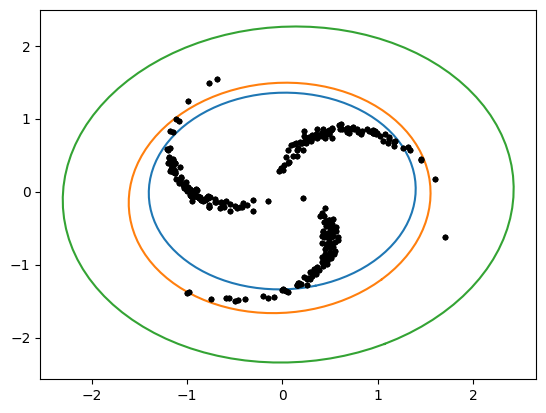

mpkl 0.42401331147772003
likelihood -664.4593446013755
aic,bic 1358.918689202751 1414.475426322594


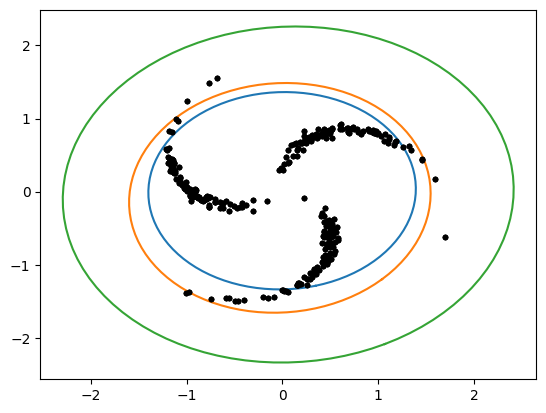

mpkl 0.4179123788812016
likelihood -664.2210803025475
aic,bic 1358.442160605095 1413.9988977249382


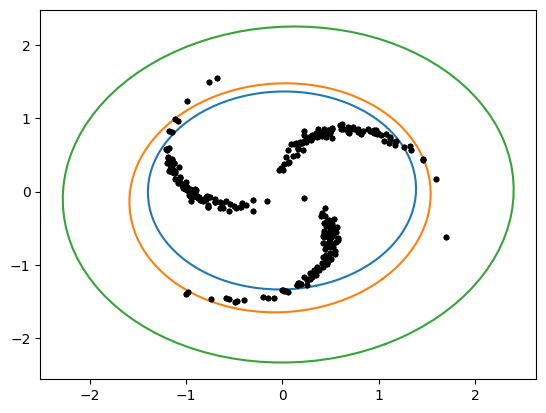

mpkl 0.4112576304800135
likelihood -664.000164793449
aic,bic 1358.000329586898 1413.5570667067411


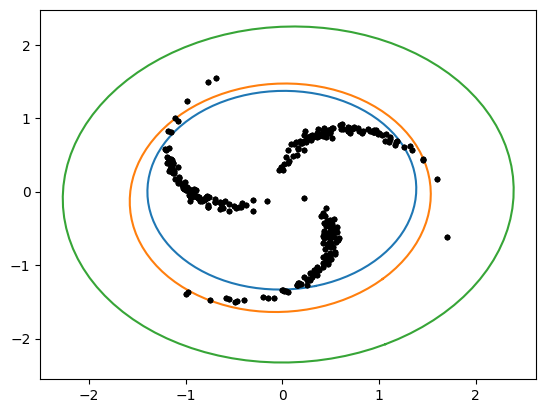

mpkl 0.4041123825562285
likelihood -663.7937996988728
aic,bic 1357.5875993977456 1413.1443365175887


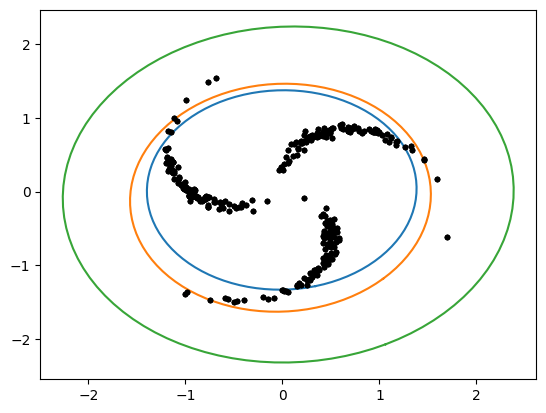

mpkl 0.3965398573999628
likelihood -663.5995493022765
aic,bic 1357.199098604553 1412.755835724396


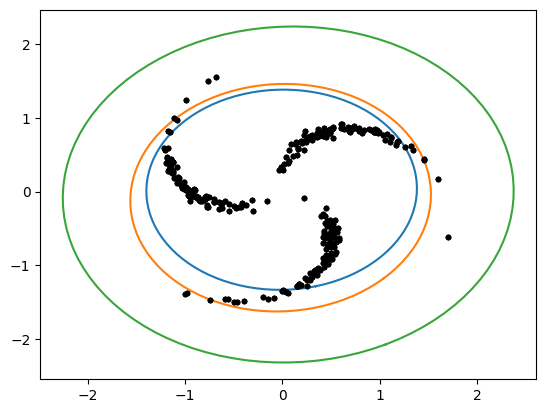

mpkl 0.38860252435339593
likelihood -663.4153393115704
aic,bic 1356.8306786231408 1412.3874157429839


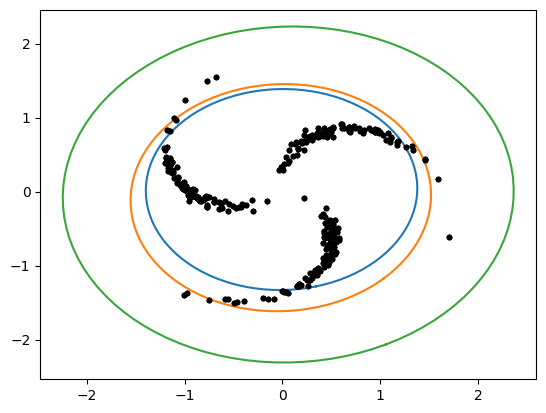

mpkl 0.38036149151371923
likelihood -663.2394460328308
aic,bic 1356.4788920656615 1412.0356291855046


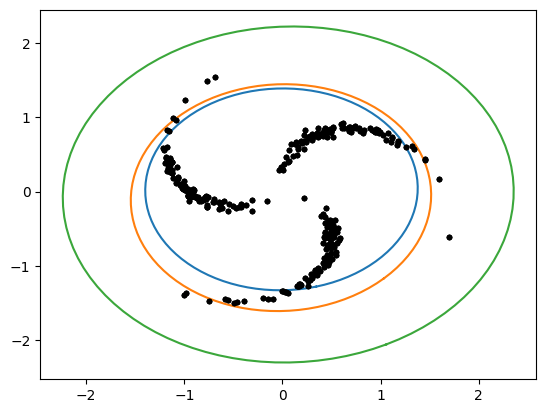

mpkl 0.37187595351681324
likelihood -663.0704770449823
aic,bic 1356.1409540899647 1411.6976912098078


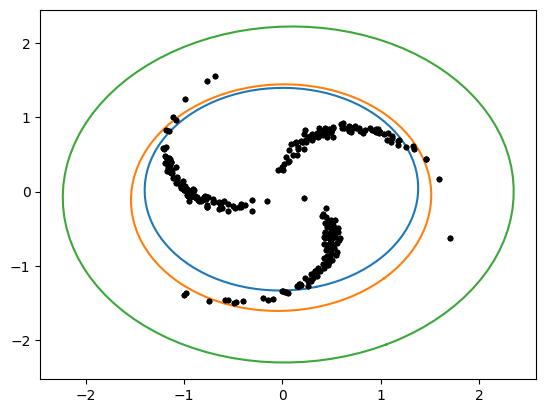

mpkl 0.36320270052139336
likelihood -662.9073448223852
aic,bic 1355.8146896447704 1411.3714267646135


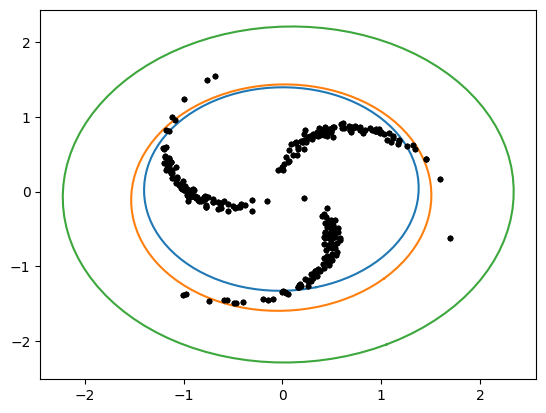

mpkl 0.3543956927560492
likelihood -662.7492349670573
aic,bic 1355.4984699341146 1411.0552070539577


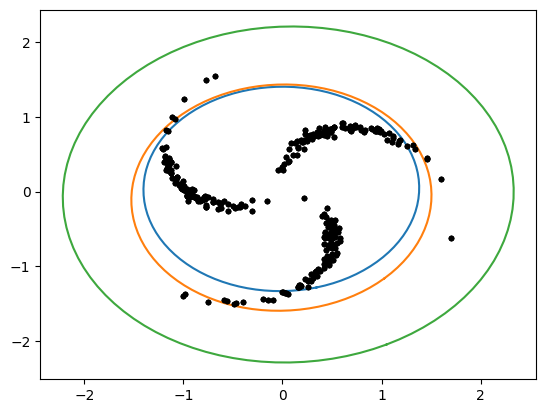

mpkl 0.34550570385980683
likelihood -662.5955707982444
aic,bic 1355.1911415964887 1410.7478787163318


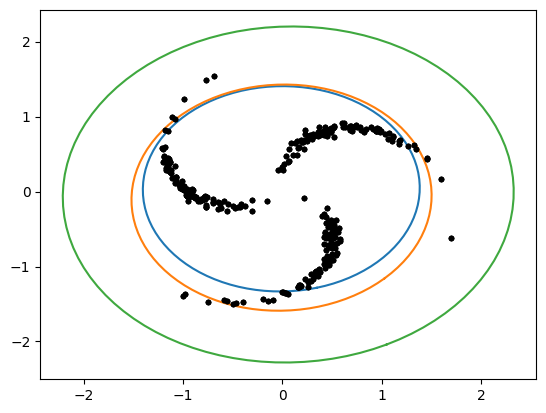

mpkl 0.3365800348468615
likelihood -662.4459760208588
aic,bic 1354.8919520417176 1410.4486891615607


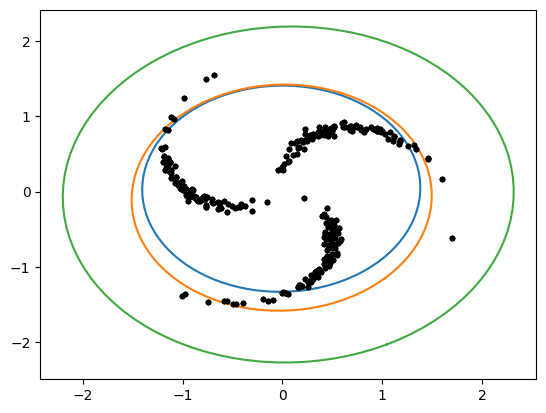

mpkl 0.3276622989744564
likelihood -662.3002370765518
aic,bic 1354.6004741531035 1410.1572112729466


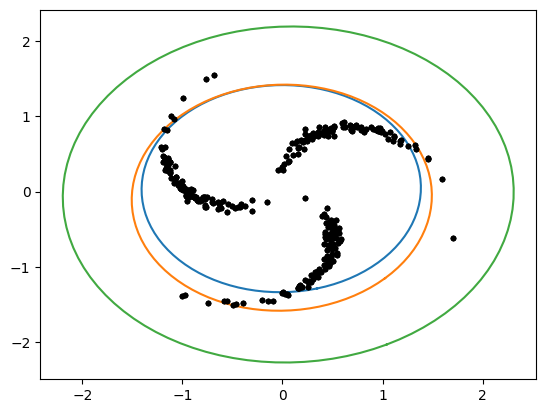

mpkl 0.31879227620374695
likelihood -662.158266594251
aic,bic 1354.316533188502 1409.8732703083451


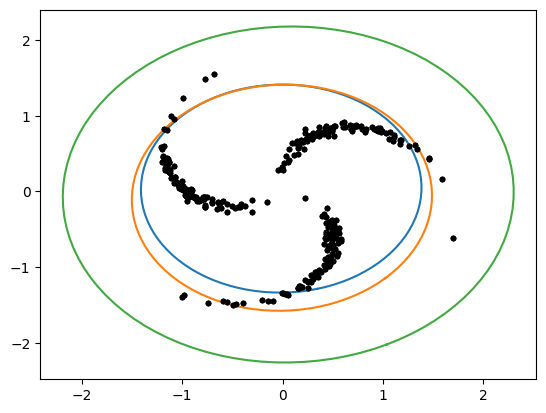

mpkl 0.31000583442000074
likelihood -662.0200691232778
aic,bic 1354.0401382465557 1409.5968753663988


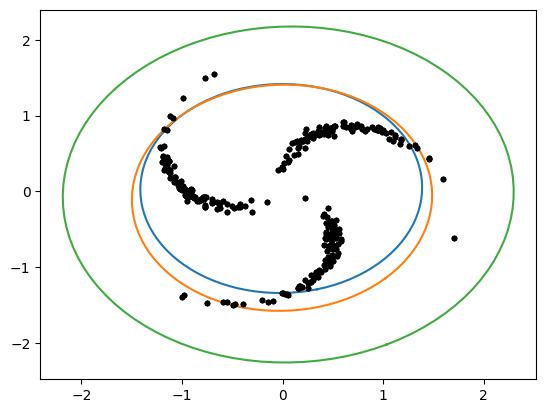

mpkl 0.3013349132054568
likelihood -661.8857100726385
aic,bic 1353.771420145277 1409.3281572651201


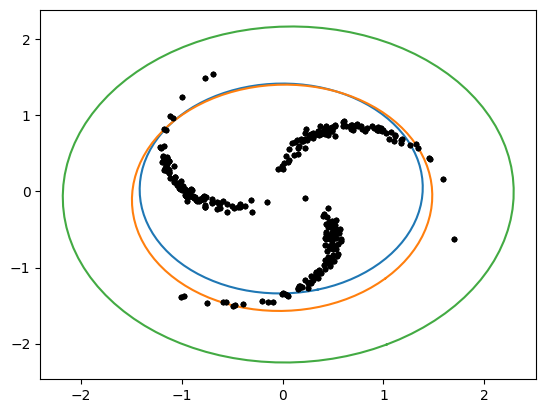

mpkl 0.29280756479954784
likelihood -661.7552885133613
aic,bic 1353.5105770267226 1409.0673141465656


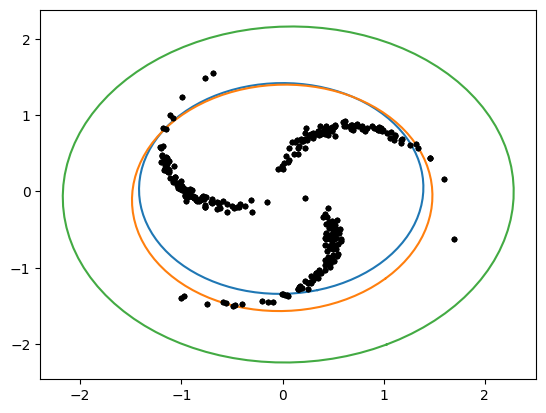

mpkl 0.28444804597838136
likelihood -661.6289142424134
aic,bic 1353.2578284848269 1408.81456560467


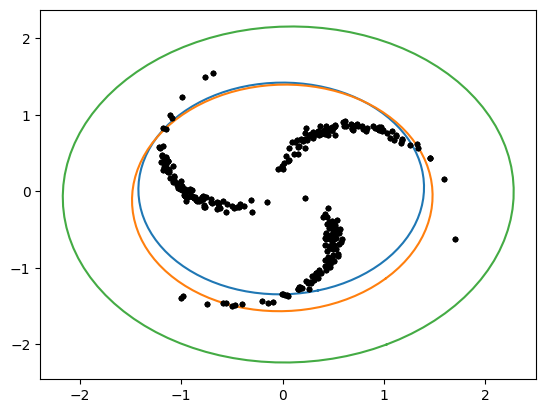

mpkl 0.27627695395865715
likelihood -661.5066892689861
aic,bic 1353.0133785379721 1408.5701156578152


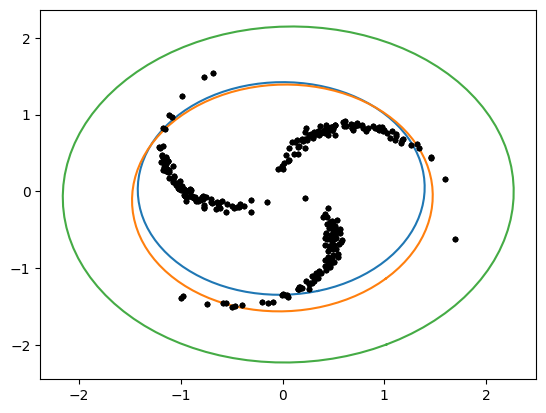

mpkl 0.2683113990816617
likelihood -661.3886936756628
aic,bic 1352.7773873513256 1408.3341244711687


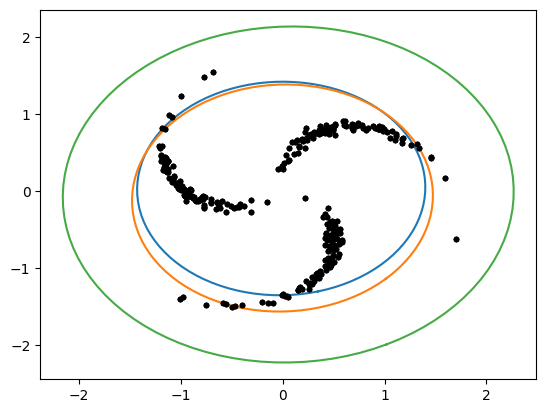

mpkl 0.2605652069461142
likelihood -661.2749756337862
aic,bic 1352.5499512675724 1408.1066883874155


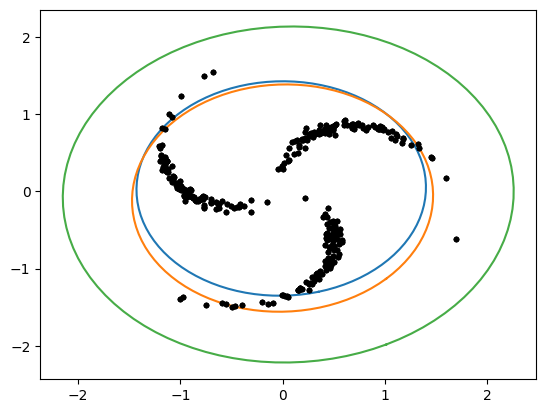

mpkl 0.25304914280767377
likelihood -661.1655452169576
aic,bic 1352.3310904339153 1407.8878275537584


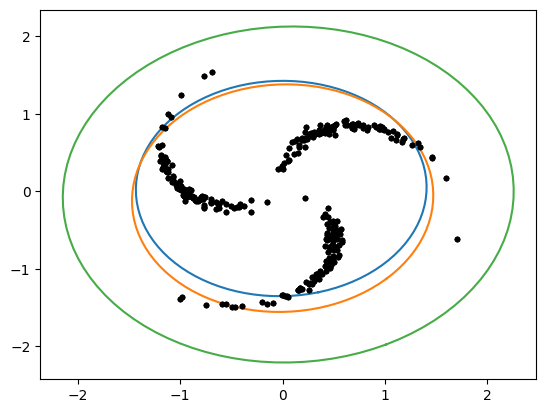

mpkl 0.24577115141299877
likelihood -661.0603715592459
aic,bic 1352.1207431184919 1407.677480238335


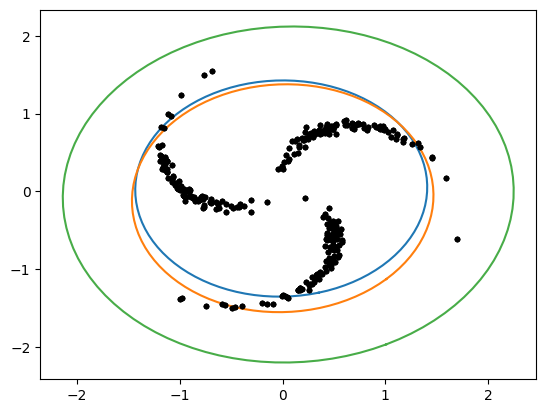

mpkl 0.23873660594736967
likelihood -660.9593828435856
aic,bic 1351.9187656871711 1407.4755028070142


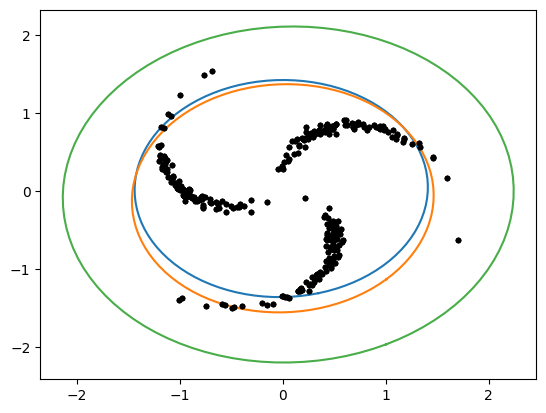

mpkl 0.2319485604058127
likelihood -660.8624685776842
aic,bic 1351.7249371553685 1407.2816742752116


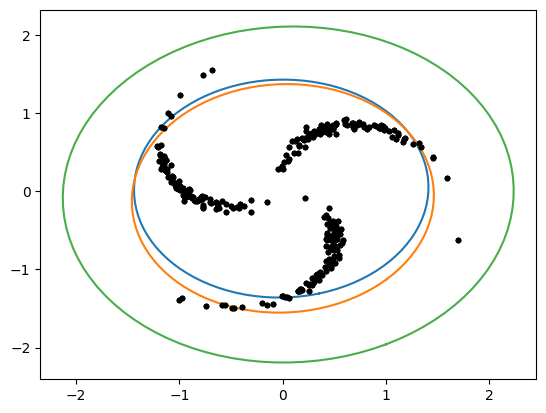

mpkl 0.22540800040771058
likelihood -660.7694836151587
aic,bic 1351.5389672303174 1407.0957043501605


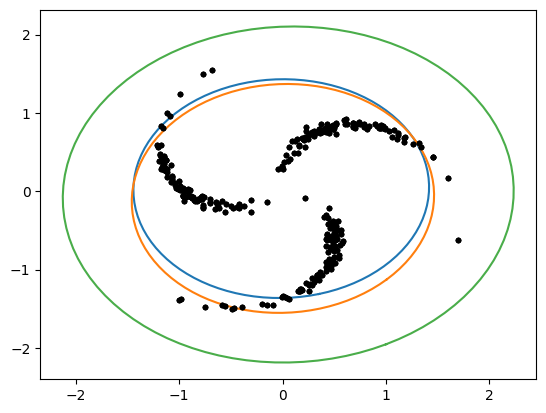

mpkl 0.21911408822665202
likelihood -660.6802534036021
aic,bic 1351.3605068072043 1406.9172439270474


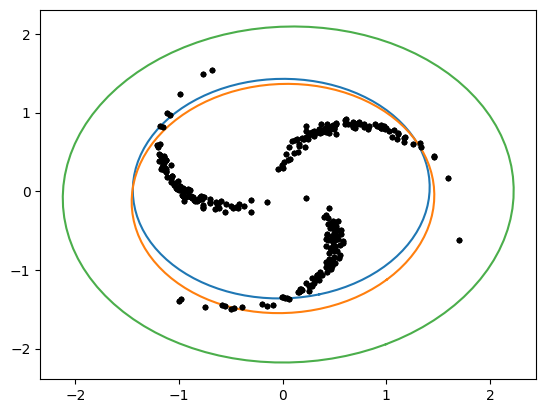

mpkl 0.2130643985674585
likelihood -660.5945799836038
aic,bic 1351.1891599672076 1406.7458970870507


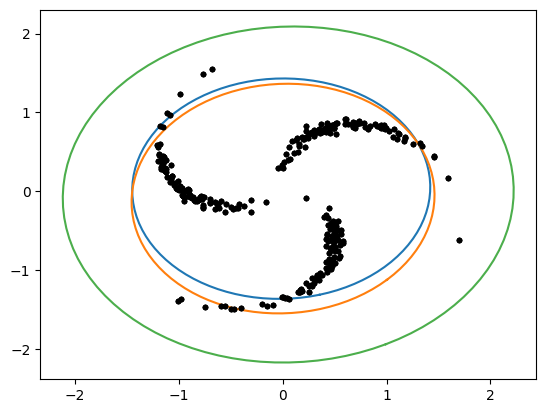

mpkl 0.20725514236312437
likelihood -660.512248318229
aic,bic 1351.024496636458 1406.5812337563011


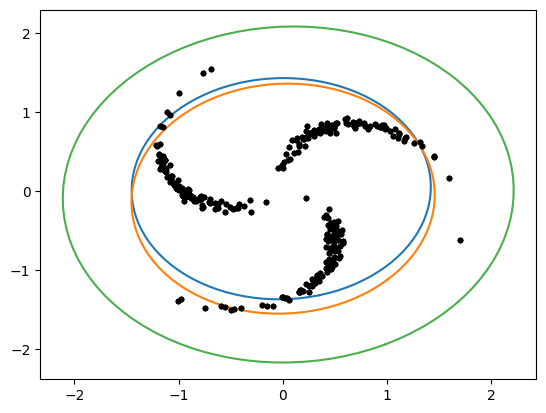

mpkl 0.2016813765633798
likelihood -660.4330325962826
aic,bic 1350.8660651925652 1406.4228023124083


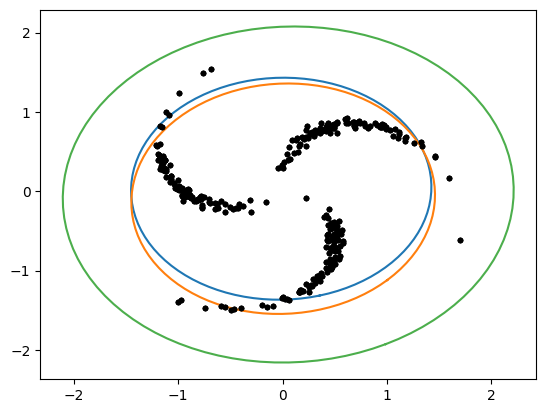

mpkl 0.19633719852718223
likelihood -660.3567022204552
aic,bic 1350.7134044409104 1406.2701415607535


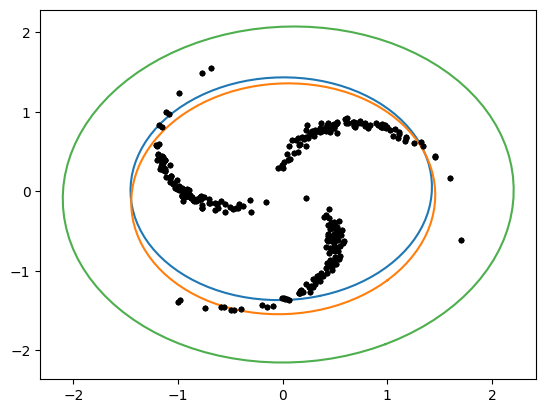

mpkl 0.19121592420217248
likelihood -660.2830272594499
aic,bic 1350.5660545188998 1406.122791638743


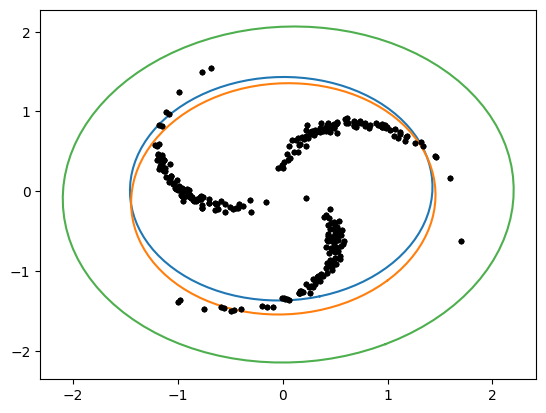

mpkl 0.18631024976851895
likelihood -660.211783208339
aic,bic 1350.423566416678 1405.9803035365212


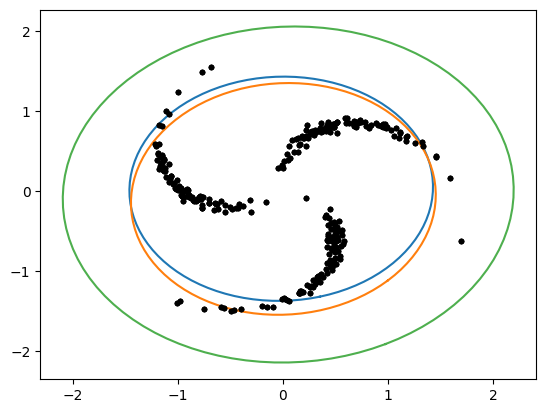

mpkl 0.1816123968400436
likelihood -660.1427549613387
aic,bic 1350.2855099226774 1405.8422470425205


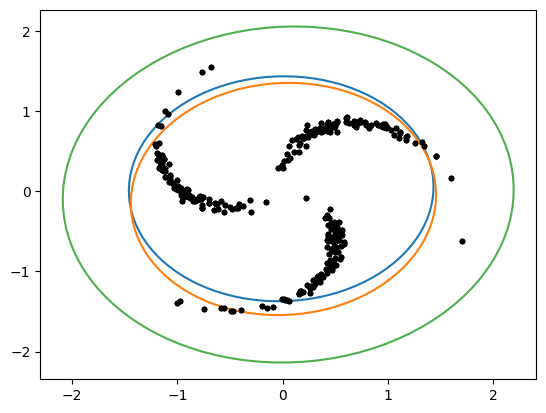

mpkl 0.17711424165320921
likelihood -660.0757399541919
aic,bic 1350.1514799083839 1405.708217028227


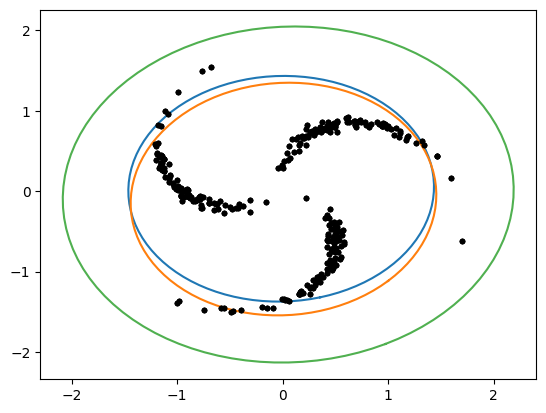

mpkl 0.17280742893788048
likelihood -660.0105504783725
aic,bic 1350.021100956745 1405.577838076588


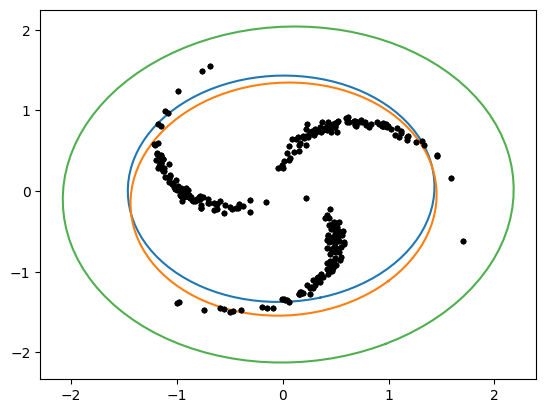

mpkl 0.16868347135862427
likelihood -659.9470152058122
aic,bic 1349.8940304116245 1405.4507675314676


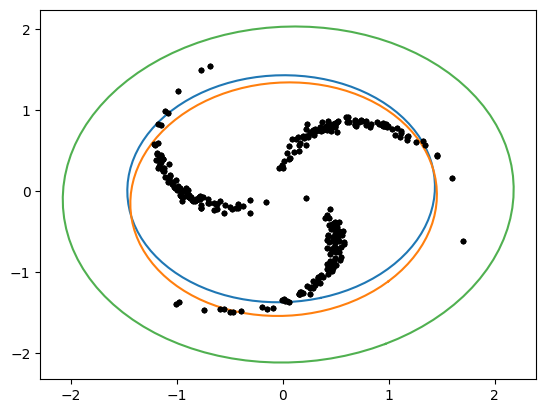

mpkl 0.1647338355484702
likelihood -659.8849799907987
aic,bic 1349.7699599815974 1405.3266971014405


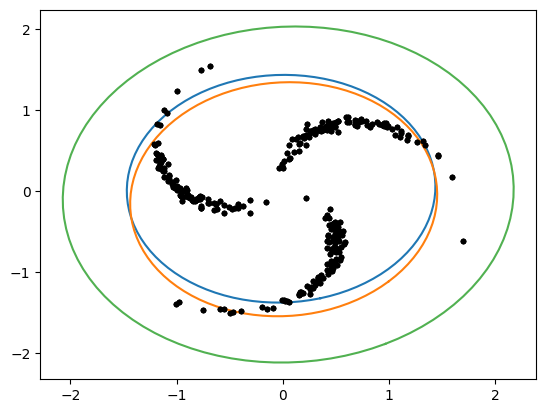

mpkl 0.16095001583651292
likelihood -659.8243080354142
aic,bic 1349.6486160708284 1405.2053531906715


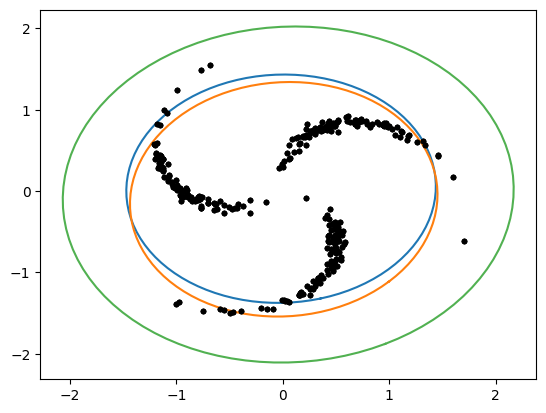

mpkl 0.15732359680448949
likelihood -659.764879517069
aic,bic 1349.529759034138 1405.086496153981


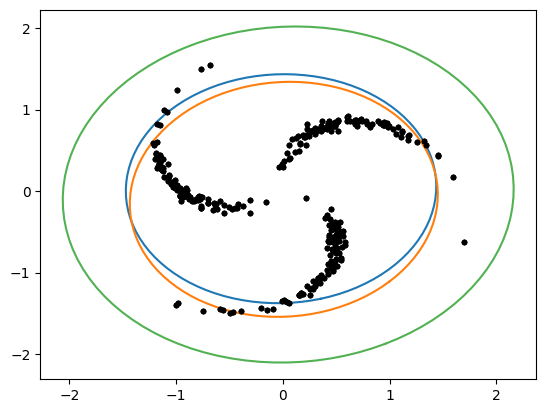

mpkl 0.1538463058037831
likelihood -659.7065907821556
aic,bic 1349.4131815643111 1404.9699186841542


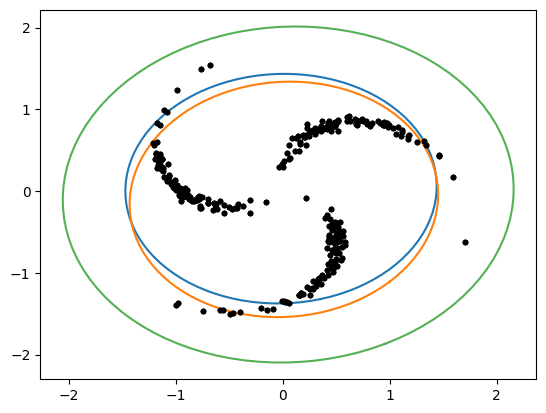

mpkl 0.15051005653079796
likelihood -659.6493532096672
aic,bic 1349.2987064193344 1404.8554435391775


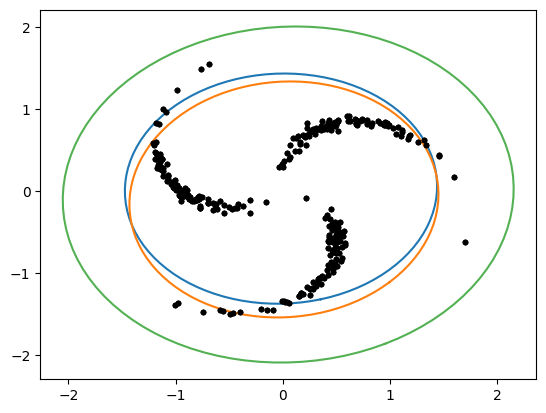

mpkl 0.14730698470276282
likelihood -659.5930918438097
aic,bic 1349.1861836876194 1404.7429208074625


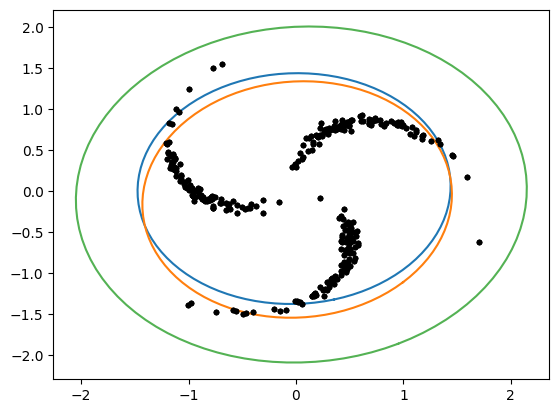

mpkl 0.14422947680413212
likelihood -659.5377438863253
aic,bic 1349.0754877726506 1404.6322248924937


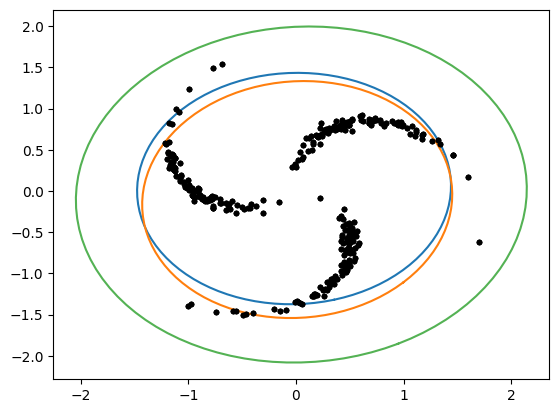

mpkl 0.14127019279167996
likelihood -659.4832571284348
aic,bic 1348.9665142568697 1404.5232513767128


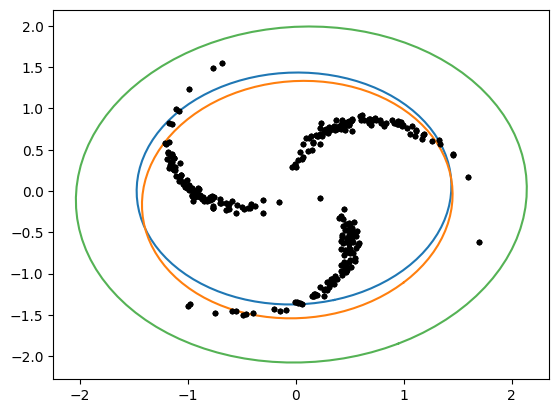

mpkl 0.1384220835591341
likelihood -659.429588389987
aic,bic 1348.859176779974 1404.415913899817


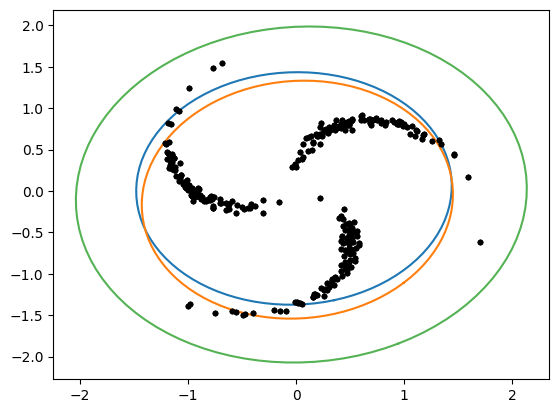

mpkl 0.13567840387365582
likelihood -659.376702020403
aic,bic 1348.753404040806 1404.310141160649


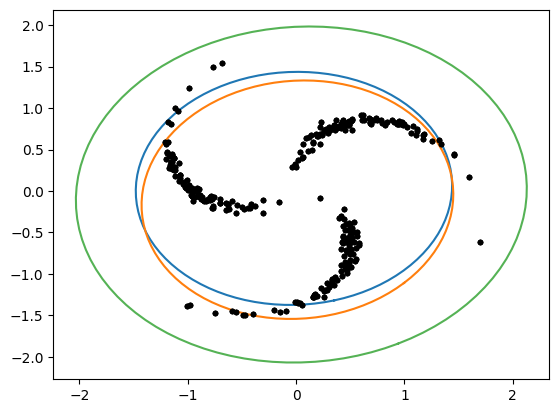

mpkl 0.13303272141016653
likelihood -659.3245685030649
aic,bic 1348.6491370061299 1404.205874125973


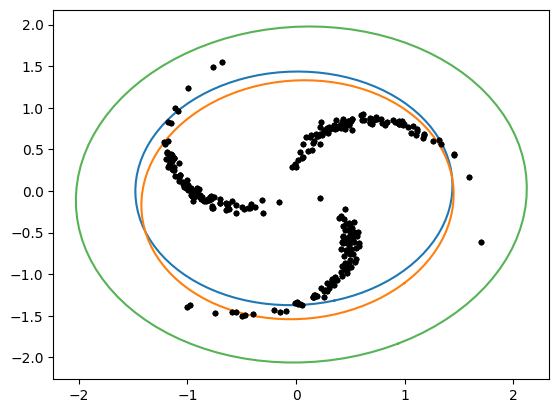

mpkl 0.13047892242771675
likelihood -659.2731631924803
aic,bic 1348.5463263849606 1404.1030635048037


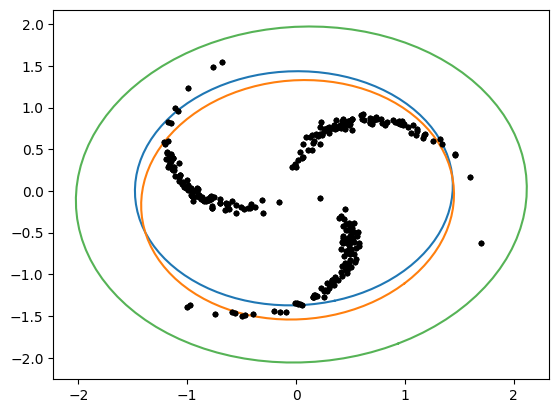

mpkl 0.12801121455674758
likelihood -659.2224652023206
aic,bic 1348.4449304046411 1404.0016675244842


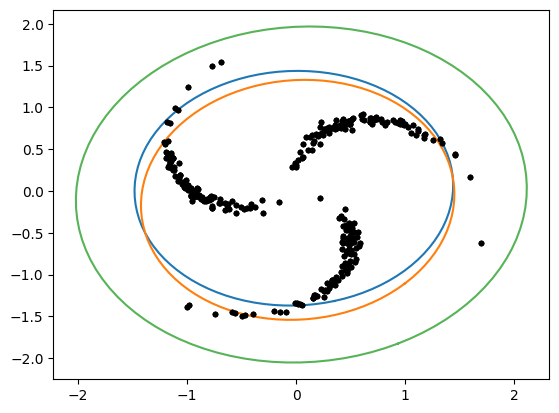

mpkl 0.1256241270983265
likelihood -659.1724564525884
aic,bic 1348.344912905177 1403.90165002502


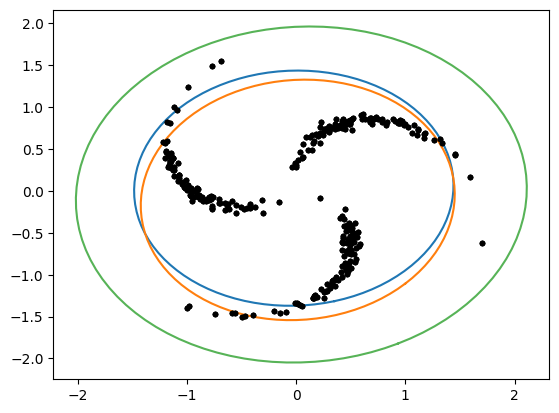

mpkl 0.12331250917686765
likelihood -659.1231208758954
aic,bic 1348.2462417517909 1403.802978871634


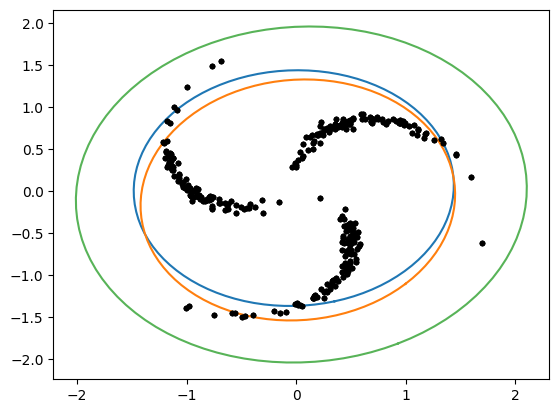

mpkl 0.12107152603663707
likelihood -659.0744437762085
aic,bic 1348.148887552417 1403.70562467226


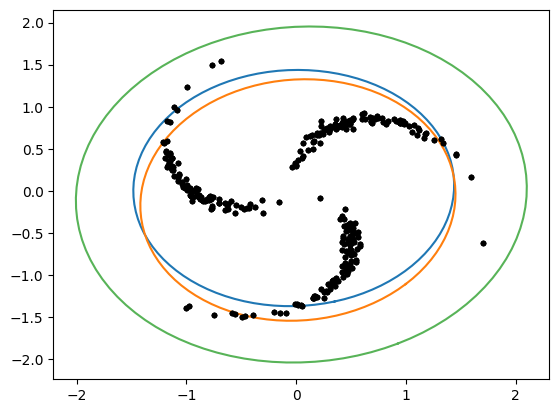

mpkl 0.1188966537293783


In [29]:
for params in params_store:
    print("likelihood",test_GMM.likelihood(params))
    print("aic,bic",test_GMM.aic(params),test_GMM.bic(params))
    

    draw_clusters(test_GMM.unpack_params(params),data)
    kl_cov = []
    for log_proportion, mean, shape, orientation, volume in zip(*test_GMM.unpack_params(params)):
        cov_sqrt = np.sqrt(volume * shape) @ orientation.T
        kl_cov.append(cov_sqrt.T @ cov_sqrt)
    print("mpkl",test_GMM.print_mpkl(params['means'],kl_cov))

In [30]:
### Final labels

np.array(test_GMM.labels(data,params_store[-1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d